<a href="https://colab.research.google.com/github/debbiedebdeb/DA-Study/blob/master/ST3_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#고객 이탈 EDA 및 모델 구축

고객을 유지하거나 빼앗아 오는데 있어서의 어떤 전략이 유용한지를 판단하는 것이 churn model의 핵심 

# IMPORT

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

from tensorflow import keras 

# FILE

In [ ]:
df_csv = '/content/drive/MyDrive/Colab Notebooks/LAB PYTHON /STUDYGROUP/data set/churn modeling/Churn_Modelling.csv'

In [ ]:
original = pd.read_csv(df_csv)

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

```
컬럼 확인

* creditscore : 신용점수 
* tenure : The time of bond with company
* NumofProducts : The products they own.
* HasCrCard : Do they have a credit card or not
* IsActiveMember : How active member they
* EstimatedSalary : 예측월급 
* Exited : Whether they stay in the or leave

```

In [ ]:
original.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# EDA

* NITESH YADAV 의 code를 참고했습니다. 

In [ ]:
# null check -- 0% 
original.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
original.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,5000.50,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.20
std,2886.90,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.40
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,2500.75,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.00
50%,5000.50,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.91,0.00
75%,7500.25,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.00
max,10000.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


## 이탈자 시각화

In [ ]:
original.Exited.value_counts() #이탈자 수 
values = original.Exited.value_counts() # seires 
labels = ['not', 'exited']

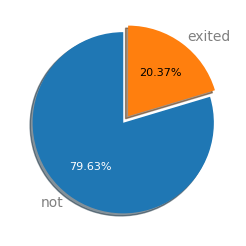

In [ ]:
fig, ax = plt.subplots(figsize = (4,3), dpi = 100)
explode = (0,0.09)

patches , texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', 
                                    shadow = True, startangle = 90, 
                                    explode = explode)
plt.setp(texts, color = 'grey')
plt.setp(autotexts,size=8, color = 'white' )
autotexts[1].set_color('black')
# text setting. texts 는 exited, not을, autotexts는 %를 나타냄 
# + plt.setp(line, color='r', linewidth=3.0) 은 선 두께, 컬러 조정
plt.show()

```
 * dpi : dpi는 인치당 도트 수를 나타냄. 100으로 미설정시 되게 작게 나타남.
* explode : 썼을때 안썼을때의 차이는 exited부분이 떨어져있냐, 아니냐 차이다. 
 * explode = () 숫자 조정시, 떨어진 정도가 달라진다. 
* autopact : 차트 내부 숫자 형식 
 * 1.2f = 소수점 2자리를 지정하고 전체길이 1은 무시됨.즉, 소숫점 두자리수로 표현하라는 말. 
* startangle : 기본 시작점은 x축방향(3시)에서 시계반대방향으로. 
 * startangle = 90 했으니, 90도가 돌아간 지점 (12시)에서 not 비율이 진행. 
```
* 참고 사이트 : https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.pie.html 

> 20.37% 고객이 이탈함

## 카테고리 변수 시각화

In [ ]:
plt.style.use('fivethirtyeight')
%matplotlib inline
# 그래프 배경 커스터마이징 
# 참고 사이트 : https://hong-yp-ml-records.tistory.com/88

In [ ]:
# 컬럼 리스트화
original.columns
categories = ['Geography', 'Gender','Tenure',  'NumOfProducts', 'HasCrCard',
       'IsActiveMember']

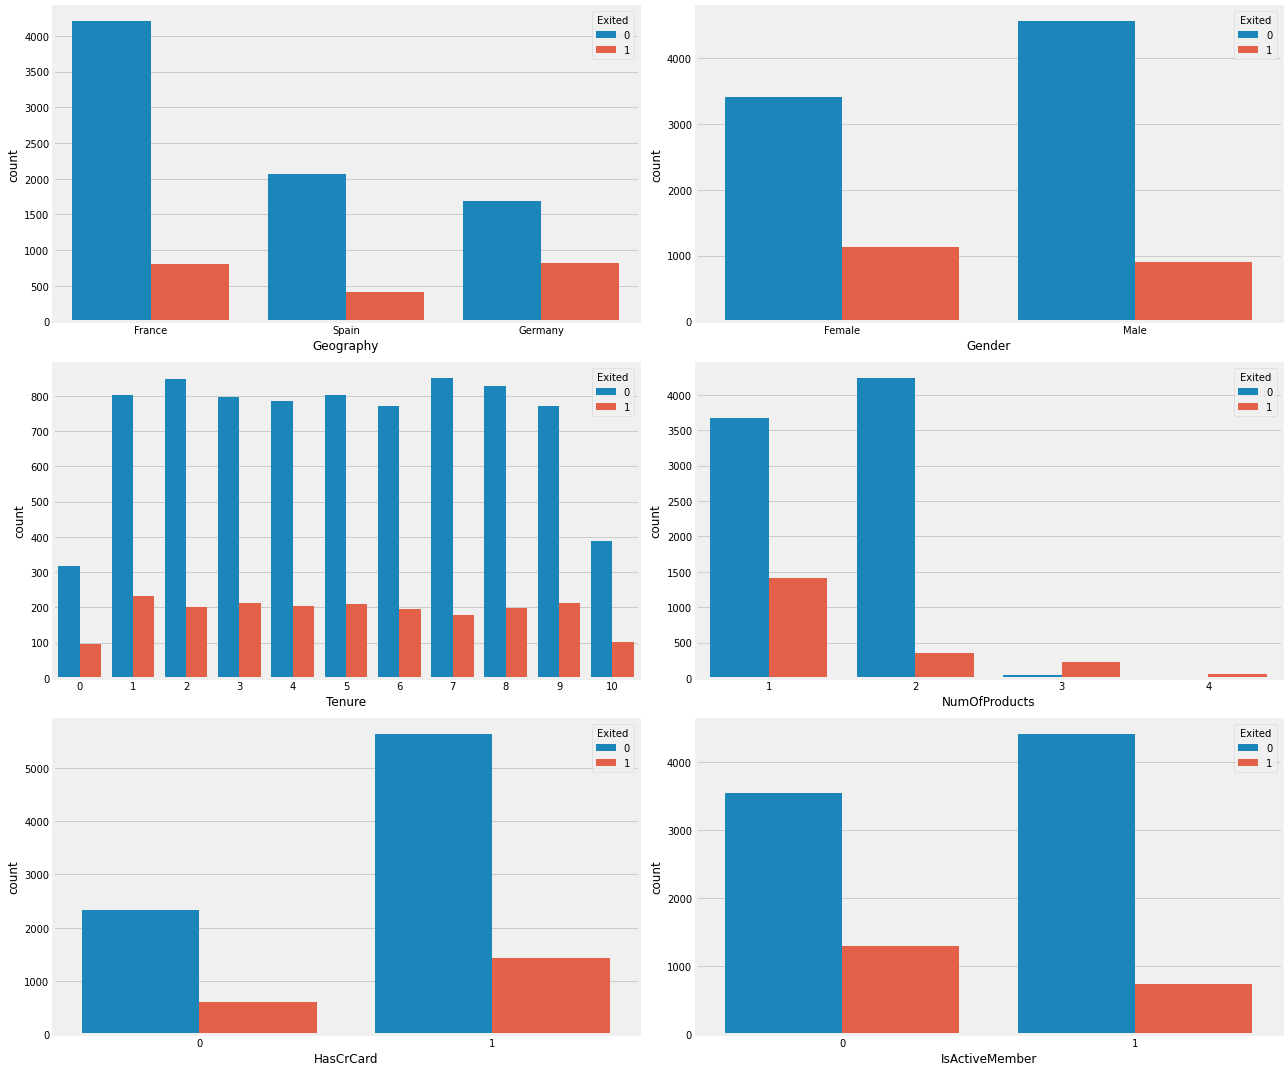

In [ ]:
fig, ax = plt.subplots(3,2, figsize = (18,15))

for i, x in enumerate(categories) : 
    m = i // 2
    n = i % 2 
    sns.countplot(x = x, hue = 'Exited', data = original, ax = ax[m,n])

plt.tight_layout()  #화면에 맞게 출력
plt.show()

> 그래프를 통해 알 수 있는 사실 (내가)
* 프랑스 고객이 가장 많고, 이탈고객은 독일인이 가장 높다.
* 남성고객이 많으나, 이탈고객은 여성비율이 높다.
* 가입한지 1년 미만 그리고 10년 이상의 고객은 이탈자 비율이 적다.
* numofproduct 를통해, 1 ~ 2개 갖는 사람들 중 이탈율은 적으나 , 3~4개 일때의 이탈비율이 높다. (코드짠 사람은 나와 다른 해석을 함) 
* 카드를 가지고 있는 사람 중 이탈자가 더 많다. (코드짠 사람 said : 대부분 신용카드를 가지고있으니 유의미한건 아닐거라 생각) 
* active 한 member의 이탈율은 적다. 

```
From above Plots we can conclude that:-

Majority of the customers are from france but most customers which churned are from germany maybe because of lack of resources as there are not many customers.
The proportion of female customers churning is also greater than that of female customers.
Majority of customers have tenure between 1 to 9 and churing rate is also high between these tenures.
Most of the customers have 1 or 2 products and most customers which churned are having 1 products maybe they are not satisfied so they are churning.
Interestingly, majority of customers that churned are those with credit cards but this can be a coincidence as majority of customers have credit cards.
Unsurprisingly the inactive members have a greater churn and the overall proportion of inactive members is also very high.
```

## 연속형 변수들 시각화

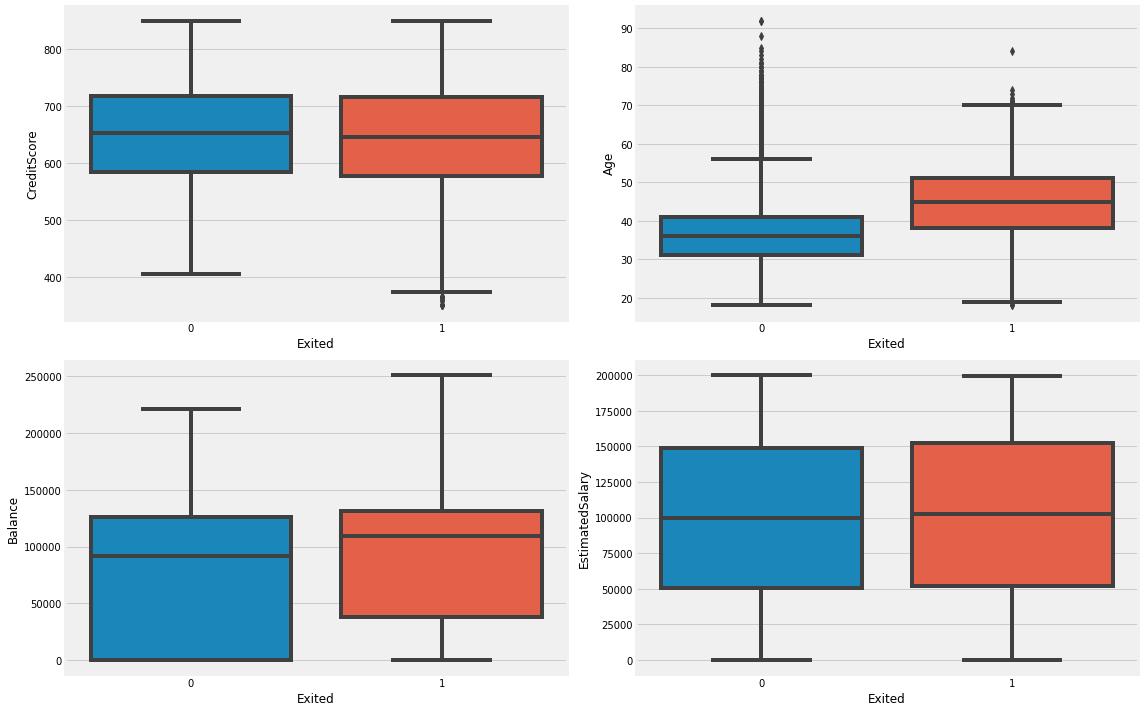

In [ ]:
num_list = ['CreditScore', 'Age','Balance', 'EstimatedSalary']

fig, ax = plt.subplots(2,2, figsize = (16, 10))

for i, x in enumerate(num_list) : 
    m = i // 2
    n = i % 2 
    sns.boxplot(x= 'Exited', y = x, data = original, ax = ax[m,n])

plt.tight_layout()
plt.show()

> 그래프를 통해 알 수 있는 사실
* 이탈자와 아닌사람들의 신용등급과 예측샐러리는 비슷하다. 
* 이탈자가 나이가 좀 더 많고,
* 통장 잔고도 이탈자가 많다. 

```
* There is no significant difference in credit score distribution between custers which are churned or not. 
* The order customers are churning more than younger ones
* Bank is loosing customers with significant bank balance.
* Estimated Salary does not have a sifnificant on the likelihood to churn. 

```

* 여기서 안 사실 : 어떤 분야의 이탈자인지 내용에 안써있어서 몰랐는데 bank 이탈자였음 

## 변수간의 상관관계 

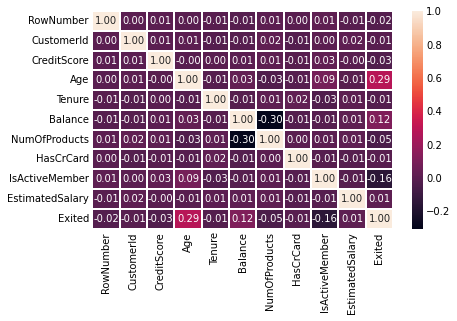

In [ ]:
corr = original.corr() # 연속형 변수들의 상관관계를 df로 만들어줌 

sns.heatmap(corr, linewidths = 1,fmt = '.2f', annot = True)
plt.show()
# linewidths = 선두께 

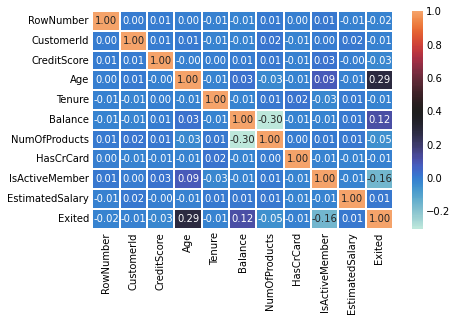

In [ ]:
corr = original.corr()

sns.heatmap(corr, linewidths = 1,fmt = '.2f', annot = True, center = 0.4)
plt.show()
# center 에 값을 넣으면, 중간값(검정)을 기준으로 높으면 (빨강) , 낮으면 파랑으로 색칠됨. 

> 다중공선성(multiconlinearity) X 

# PREPROCESSING

In [ ]:
#dropping uesless columns 

original.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
original.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
original.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
original.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
# Encoding Categorical Varibales 

original['Geography'] = original['Geography'].map({'France' : 0, 'Germany' : 1,
                                                   'Spain' : 2}) 
original['Gender'] = original['Gender'].map({'Male' : 0, 'Female' : 1})

In [ ]:
# labeling 다른 방법
from sklearn.preprocessing import LabelEncoder

# lb = LabelEncoder()
# lb.fit_transform(original.Geography)
# lb.fit_transform(original.Gender)

In [ ]:
original.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


# SPLIT

In [ ]:
y = original.Exited.values
X = original.drop('Exited', axis = 1).values

In [ ]:
X.shape, y.shape

((10000, 10), (10000,))

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y , test_size = 0.25)

In [ ]:
# scaling data
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_tr = scale.fit_transform(X_tr)
X_te = scale.transform(X_te)

# MODEILING

In [ ]:
import tensorflow as tf
from tensorflow import keras 

In [ ]:
# first layer
model = keras.Sequential()
model.add(keras.layers.Dense(units = 10, kernel_initializer = 'normal',
                             activation = 'relu', 
                             input_shape=(10, )))

#adding batch normalization and dropout layer
# 참고 사이트 : https://eehoeskrap.tistory.com/430
model.add(keras.layers.Dropout(rate = 0.1))
model.add(keras.layers.BatchNormalization())

#adding the 3rd hidden layer
model.add(keras.layers.Dense(units = 7, kernel_initializer='normal', 
                             activation = 'relu'))

# adding batch normalization and dropout layer
model.add(keras.layers.Dropout(rate = 0.1))
model.add(keras.layers.BatchNormalization())

# adding the output layer
model.add(keras.layers.Dense(units = 1, kernel_initializer='normal', 
                             activation = 'sigmoid'))

In [ ]:
# compiling 
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

#fitting the model to the X_tr set
model_history = model.fit(X_tr, y_tr, validation_split = 0.2, 
                          validation_data = (X_te, y_te), epochs = 100, )

Epoch 1/100
188/188 [==============================] - 2s 4ms/step - loss: 0.6344 - accuracy: 0.6822 - val_loss: 0.5809 - val_accuracy: 0.7947
Epoch 2/100
188/188 [==============================] - 1s 3ms/step - loss: 0.4886 - accuracy: 0.7988 - val_loss: 0.4639 - val_accuracy: 0.7960
Epoch 3/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.8235 - val_loss: 0.3991 - val_accuracy: 0.8300
Epoch 4/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4046 - accuracy: 0.8293 - val_loss: 0.3735 - val_accuracy: 0.8420
Epoch 5/100
188/188 [==============================] - 0s 2ms/step - loss: 0.3846 - accuracy: 0.8423 - val_loss: 0.3564 - val_accuracy: 0.8573
Epoch 6/100
188/188 [==============================] - 0s 2ms/step - loss: 0.3848 - accuracy: 0.8417 - val_loss: 0.3498 - val_accuracy: 0.8573
Epoch 7/100
188/188 [==============================] - 1s 3ms/step - loss: 0.3892 - accuracy: 0.8345 - val_loss: 0.3533 - val_accuracy: 0.8473

# VISUALIZING TRAINING 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


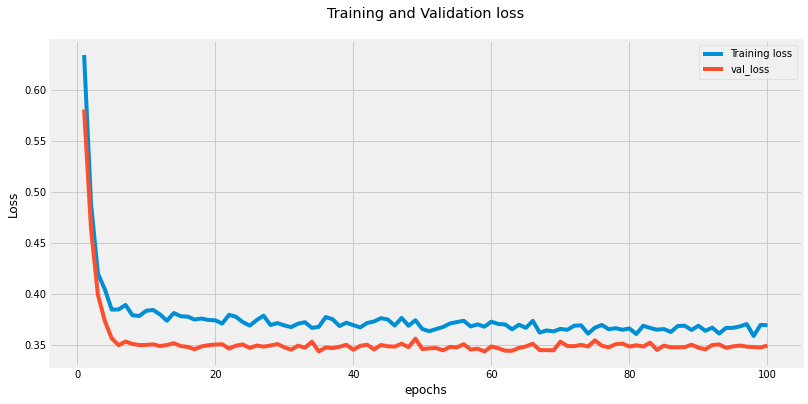

In [ ]:
plt.figure(figsize = (12,6))

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epoch = range(1,101)
sns.lineplot(epoch, train_loss, label = 'Training loss')
sns.lineplot(epoch, val_loss, label= 'val_loss')

plt.title('Training and Validation loss\n')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


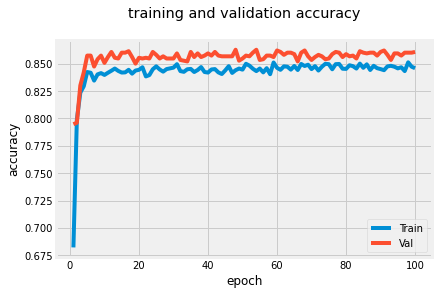

In [ ]:
train_acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

sns.lineplot(epoch, train_acc, label = 'Train')
sns.lineplot(epoch, val_acc, label = 'Val')

plt.title('training and validation accuracy\n')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
acc = model.evaluate(X_te, y_te)[1]
print(f'Accuracy of model is {acc}')

79/79 [==============================] - 0s 2ms/step - loss: 0.3403 - accuracy: 0.8672
Accuracy of model is 0.8672000169754028


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 7)                 77        
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 batch_normalization_1 (Batc  (None, 7)                28        
 hNormalization)                                        

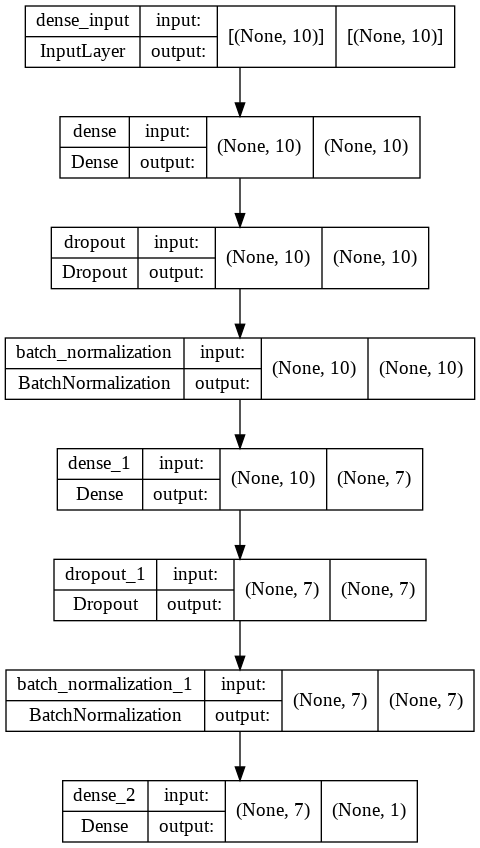

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

* cross entropy에 대해 자세한 설명 : https://3months.tistory.com/436
* SGD 관련 설명( 딥러닝에 사용되는 최적화알고리즘을 정리) : https://hiddenbeginner.github.io/deeplearning/2019/09/22/optimization_algorithms_in_deep_learning.html#momentum